# Simple Regression Analysis

Regression analysis is a powerful statistical method that allows you to examine the relationship between two or more variables of interest. While there are many types of regression analysis, at their core they all examine the influence of one or more independent variables(x) on a dependent variable(y).<br>
**Dependent Variable:** This is the main factor that you’re trying to understand or predict. <br>
**Independent Variables:** These are the factors that you hypothesize have an impact on your dependent variable.<br>

# Dataset
It is small database showing number of years and salary. We need to find how number of years effect salary level. It is expected to have a linear relationship between the two i.e if number of years increase then expected salary will also increase

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x = dataset.drop('Salary', 1)
y = dataset.Salary

In [5]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [6]:
type(x)

pandas.core.frame.DataFrame

In [7]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [8]:
type(y)

pandas.core.series.Series

## Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

## Fitting Simple Linear Regression to the Training set

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predicting the Test set results

In [11]:
y_pred = regressor.predict(x_test)

## Visualising the Training set results

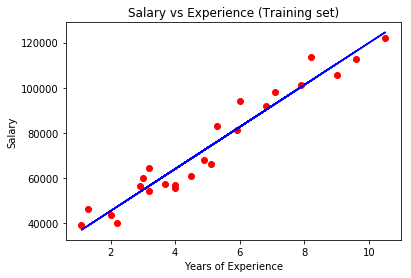

In [12]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

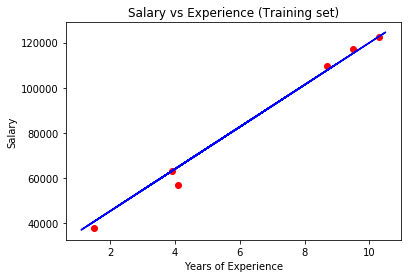

In [14]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Multiple regression
Multiple regression is an extension of simple linear regression. It is used when we want to predict the value of a variable based on the value of two or more other variables. The variable we want to predict is called the dependent variable (or sometimes, the outcome, target or criterion variable).

# Database
We have given R&D spend, Administration cost and Marketeting spend. We need to see how these expenditures are related to profit of organization. As there are more than one variable to be analyzed , we need to apply a method that shows us result of association and effect for all of given features. That's why we use multiple regression

## Importing the dataset

In [15]:
df2 = pd.read_csv('50_Startups.csv')
df2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Dummy Variable

In [16]:
df2['State'].value_counts().sort_values(ascending=False).head()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [17]:
# we want to use k-1 approach to keep base category
df2 = pd.get_dummies(df2,columns=['State'])

In [18]:
df2.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


## Splitting data as dependent and independent variables

In [19]:
x = df2.drop('Profit', 1)
y=df2.Profit

In [20]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [21]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

## Splitting the dataset into the Training set and Test set

In [22]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Fitting Multiple Linear Regression to the Training set

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predicting the Test set results

In [24]:
y_pred = regressor.predict(x_test)

## Checking our model of y-test with y_predict

In [25]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [26]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

## Building the optimal model using Backward Elimination

In [27]:
import statsmodels.formula.api as sm
x = np.append(arr=np.ones((50, 1)).astype(int), values=x, axis=1)
x_opt = x[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           1.34e-27
Time:                        22:50:12   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4            41.8870   3256.039      0.013      0.990   -6520.229    6604.003
x5           240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**We will take into account only those variables whose p-value is less than 0.05 i.e 5%. We can see that x2 is of 0.608. So we will remove it out of our model.<br>
Other variables are also less than that p-value. For a step wise approach , we ll keep them for now. We will remove one by one. Constant variable is not taken into account as it shows intercept.<br>
Same proceess will be done unleass we get the right result where p-value is of 0.05 or less.**

In [28]:
x_opt = x[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           9.72e-29
Time:                        22:50:14   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.694e+04   3342.591     14.043      0.000    4.02e+04    5.37e+04
x1             0.7967      0.042     18.771      0.000       0.711       0.882
x2             0.0298      0.016      1.842      0.072      -0.003       0.062
x3            19.5234   3229.138      0.006      0.995   -6484.294    6523.340
x4           160.3104   3307.973      0.048      0.962   -6502.289    6822.910
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     8.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
x_opt = x[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     19.71
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           2.32e-08
Time:                        22:50:15   Log-Likelihood:                -579.99
No. Observations:                  50   AIC:                             1168.
Df Residuals:                      46   BIC:                             1176.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.284e+04   9503.488      6.612      0.000    4.37e+04     8.2e+04
x1             0.2480      0.033      7.525      0.000       0.182       0.314
x2         -4196.5465   9467.707     -0.443      0.660   -2.33e+04    1.49e+04
x3         -5391.1265   9683.464     -0.557      0.580   -2.49e+04    1.41e+04
==============================================================================
Omnibus:                        3.720   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                2.973
Skew:                          -0.299   Prob(JB):                        0.226
Kurtosis:                       4.034   Cond. No.                     8.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
x_opt = x[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     29.99
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           4.04e-09
Time:                        22:50:16   Log-Likelihood:                -580.09
No. Observations:                  50   AIC:                             1166.
Df Residuals:                      47   BIC:                             1172.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.052e+04   7859.603      7.700      0.000    4.47e+04    7.63e+04
x1             0.2491      0.033      7.650      0.000       0.184       0.315
x2         -3354.7282   8451.035     -0.397      0.693   -2.04e+04    1.36e+04
==============================================================================
Omnibus:                        3.771   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.997
Skew:                          -0.314   Prob(JB):                        0.223
Kurtosis:                       4.022   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
x_opt = x[:, [0, 3]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           4.38e-10
Time:                        22:50:16   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
x1             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Polynomial Regression
In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

## Importing the dataset

In [32]:
df3 = pd.read_csv('Position_Salaries.csv')

In [33]:
df3.head

<bound method NDFrame.head of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>

In [34]:
df3.shape

(10, 3)

In [35]:
X = df3.iloc[:, 1:2].values
y = df3.iloc[:, 2].values

In [36]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [37]:
type(X)

numpy.ndarray

In [38]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [39]:
type(y)

numpy.ndarray

**For such a small dataset, we wont do any split into training or test set**

## Fitting Linear Regression to the dataset

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Fitting Polynomial Regression to the dataset

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) # shows a degree 2 polynomial
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Visualization

### Visualising the Linear Regression results

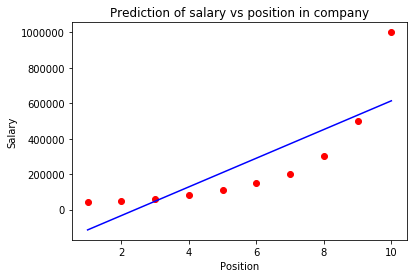

In [42]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue') # As we are plotting real vs predicting value
plt.title('Prediction of salary vs position in company')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

**This plot shows that fitting line does not predict values very well. Upper value is at 100K and prediction shows only 58k
Same goes with lower values. Some are predicted too low and some are higher. So we need a fitting line that captures good predicting pattern. So, we can see linear regression is failed to do
So we will see how polynomial regression did.**

### Visualising the Polynomial Regression results

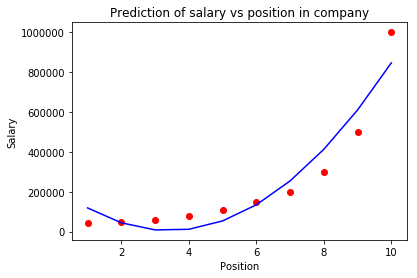

In [43]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue') # notice we have taken whole term of x_poly here
plt.title('Prediction of salary vs position in company')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

**Clearly polynomial provides better prediction. It not 100% but, it can be considered as better solution for predicting salary of employers according to their level.We would like to see if we could achieve better result. So we use higher degree of polynomial**

### Fitting Polynomial Regression to the dataset with degree=3

In [44]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Visualising the Polynomial Regression results with degree=3

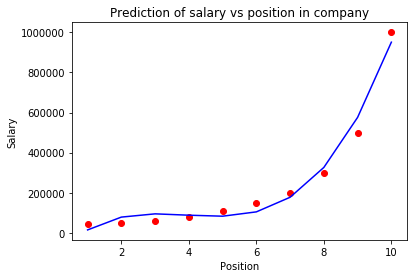

In [45]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Prediction of salary vs position in company')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

So there is certainly an improvment. Our prediction vs real values are getting more close. We ll give it another try with a degree 4

### Fitting Polynomial Regression to the dataset with degree=4

In [46]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

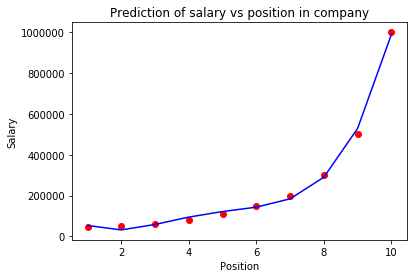

In [47]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Prediction of salary vs position in company')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

**Checking our prediction for a 6.5 level**

## Fitting Polynomial Regression to the dataset with degree=4

In [48]:
lin_reg.predict(6.5)

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [49]:
lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([158862.45265153])